In [1]:
#Import datset, show first lines
#Import dataset
import csv
import pandas as pd
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Check if the file has been uploaded
file_name = next(iter(uploaded))

# Initialize an empty list to store the rows
data = []

# Open the CSV file and handle the delimiter
with open(file_name, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')

    # Skip the header row if needed
    # next(reader)  # Uncomment this line if the first row is the header

    # Append each row to the data list
    for row in reader:
        data.append(row)

# Create a Pandas DataFrame from the data
df = pd.DataFrame(data[1:], columns=data[0])

# Display the first few rows of the dataset
print(df.head())

# Check data types and missing values
print(df.info())


Saving tweets_remaining_09042020_16072020.csv to tweets_remaining_09042020_16072020.csv
  id                 created_at  \
0  1  2020-04-09 23:59:51+00:00   
1  2  2020-04-09 23:58:55+00:00   
2  3  2020-04-09 23:58:52+00:00   
3  4  2020-04-09 23:58:27+00:00   
4  5  2020-04-09 23:57:59+00:00   

                                           full_text  
0  @KennyDegu very very little volume. With $10T ...  
1  #ES_F achieved Target 2780 closing above 50% #...  
2  RT @KimbleCharting: Silver/Gold indicator crea...  
3  @Issaquahfunds Hedged our $MSFT position into ...  
4  RT @zipillinois: 3 Surprisingly Controversial ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923673 entries, 0 to 923672
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          923673 non-null  object
 1   created_at  923673 non-null  object
 2   full_text   923673 non-null  object
dtypes: object(3)
memory usage: 21.1+ MB
None


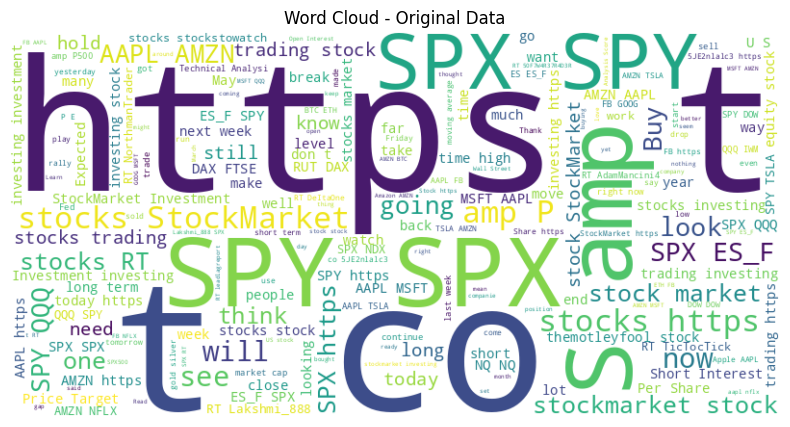

In [3]:
#Word Cloud (before preprocessing)
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Read the uploaded CSV file
uploaded_file_name = "tweets_remaining_09042020_16072020.csv"  # Replace with the actual file name
df = pd.read_csv(uploaded_file_name, delimiter=';')

# Create a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(' '.join(df['full_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Original Data")
plt.show()





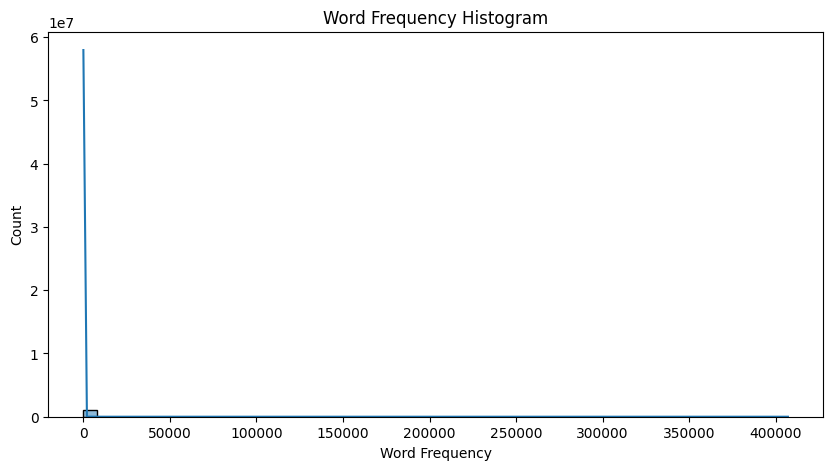

In [4]:
#Word Frequency Histogram (before preprocessing)
import seaborn as sns
from collections import Counter

# Tokenize and count word frequencies
words = ' '.join(df['full_text']).split()
word_freq = Counter(words)

# Create a histogram of word frequencies
plt.figure(figsize=(10, 5))
sns.histplot(list(word_freq.values()), bins=50, kde=True)
plt.title("Word Frequency Histogram")
plt.xlabel("Word Frequency")
plt.ylabel("Count")
plt.show()


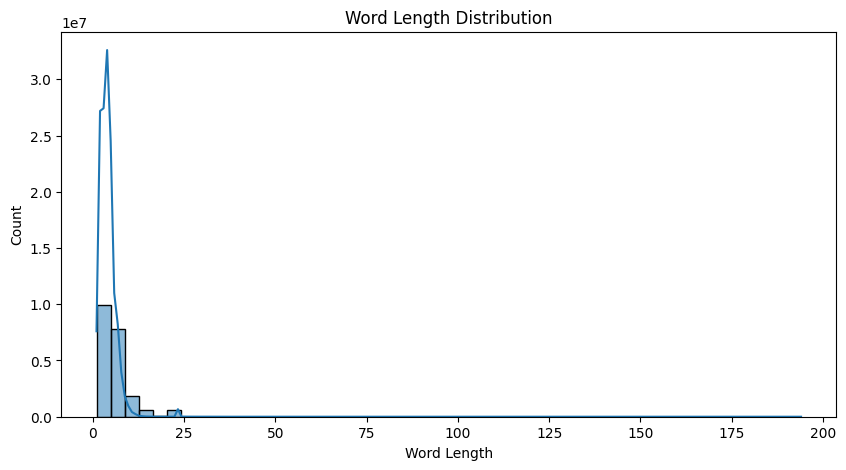

In [5]:
# Create a distribution plot of word lengths
word_lengths = [len(word) for word in words]
plt.figure(figsize=(10, 5))
sns.histplot(word_lengths, bins=50, kde=True)
plt.title("Word Length Distribution")
plt.xlabel("Word Length")
plt.ylabel("Count")
plt.show()


In [6]:
#Statistics in preprocessed dataset
import pandas as pd

# Read the uploaded CSV file (replace 'your_dataset.csv' with your actual file name)
uploaded_file_name = "tweets_remaining_09042020_16072020.csv"
df = pd.read_csv(uploaded_file_name, delimiter=';')

# Number of tweets in the dataset
num_tweets = len(df)

# Average tweet length (in characters or words)
df['tweet_length_chars'] = df['full_text'].apply(len)
df['tweet_length_words'] = df['full_text'].str.split().apply(len)
avg_tweet_length_chars = df['tweet_length_chars'].mean()
avg_tweet_length_words = df['tweet_length_words'].mean()

# The most active users/authors
# Replace 'user' with the correct column name for user/author information ('id' may refer to user ID)
most_active_users = df['id'].value_counts().head()

# Most common hashtags and mentions
hashtags = df['full_text'].str.findall(r'#\w+').explode().value_counts().head()
mentions = df['full_text'].str.findall(r'@\w+').explode().value_counts().head()

# Print the computed statistics
print(f"Number of tweets: {num_tweets}")
print(f"Average tweet length (characters): {avg_tweet_length_chars:.2f}")
print(f"Average tweet length (words): {avg_tweet_length_words:.2f}")
print("\nMost active users/authors:")
print(most_active_users)
print("\nMost common hashtags:")
print(hashtags)
print("\nMost common mentions:")
print(mentions)


Number of tweets: 923673
Average tweet length (characters): 151.22
Average tweet length (words): 22.51

Most active users/authors:
1         1
625753    1
625785    1
625786    1
625787    1
Name: id, dtype: int64

Most common hashtags:
#stocks         221845
#investing       50487
#trading         47580
#StockMarket     35003
#Stocks          33161
Name: full_text, dtype: int64

Most common mentions:
@themotleyfool     8853
@NorthmanTrader    6393
@TicTocTick        6072
@Lakshmi_888       5625
@AdamMancini4      5036
Name: full_text, dtype: int64


In [7]:
#Statistics - exploratory
import pandas as pd

# Load the dataset
file_path = "tweets_remaining_09042020_16072020.csv"  # Replace with your file path
df = pd.read_csv(file_path, delimiter=';')

# Get basic statistics for all columns
all_stats = df.describe(include='all')

# Display the statistics
print(all_stats)



                   id                 created_at  \
count   923673.000000                     923673   
unique            NaN                     829053   
top               NaN  2020-06-29 02:00:04+00:00   
freq              NaN                         22   
mean    469322.547219                        NaN   
std     270977.625595                        NaN   
min          1.000000                        NaN   
25%     234636.000000                        NaN   
50%     469331.000000                        NaN   
75%     704006.000000                        NaN   
max     938672.000000                        NaN   

                                                full_text  
count                                              923673  
unique                                             677585  
top     RT @ChrisDungeon: "Innovation has nothing to d...  
freq                                                 1677  
mean                                                  NaN  
std            

In [8]:
#Text Analysis (Word frequency analysis-most common words; N-grams analysis-common word pairs or triplets))
import pandas as pd
from collections import Counter
from nltk.util import ngrams
import nltk
nltk.download('punkt')  # Download the necessary data for tokenization

# Read the uploaded CSV file (replace 'your_dataset.csv' with your actual file name)
uploaded_file_name = "tweets_remaining_09042020_16072020.csv"
df = pd.read_csv(uploaded_file_name, delimiter=';')

# Tokenize and count word frequencies
words = ' '.join(df['full_text']).split()
word_freq = Counter(words)

# Create a list of n-grams (e.g., bigrams, trigrams)
n = 2  # Change n to the desired n-gram (e.g., 2 for bigrams, 3 for trigrams)
n_grams = list(ngrams(words, n))

# Count the frequencies of n-grams
n_gram_freq = Counter(n_grams)

# Print the most common words
print("Most common words:")
print(word_freq.most_common(10))  # Change 10 to the desired number of top words

# Print the most common n-grams
print(f"Most common {n}-grams:")
print(n_gram_freq.most_common(10))  # Change 10 to the desired number of top n-grams


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Most common words:
[('the', 407100), ('RT', 350605), ('to', 323773), ('#stocks', 217533), ('of', 216546), ('a', 207566), ('in', 202674), ('and', 202225), ('for', 177042), ('is', 168065)]
Most common 2-grams:
[(('in', 'the'), 39611), (('of', 'the'), 32968), (('for', 'the'), 22871), (('on', 'the'), 22643), (('$SPY', '$SPX'), 17351), (('$SPX', '$SPY'), 16632), (('to', 'the'), 13784), (('is', 'a'), 12966), (('S&amp;P', '500'), 12751), (('to', 'be'), 12615)]


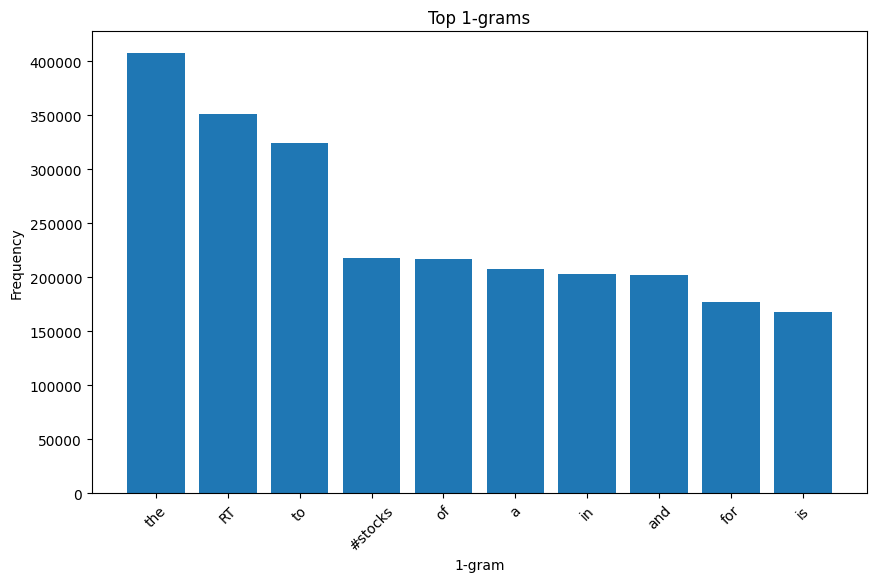

In [12]:
#Histogram unigrams before preprocessing
import matplotlib.pyplot as plt
from collections import Counter

# Create a list of n-grams (e.g., bigrams, trigrams)
n = 1  # Change n to 3 for trigrams
n_grams = [' '.join(words[i:i + n]) for i in range(len(words) - n + 1)]

# Count the frequencies of n-grams
n_gram_freq = Counter(n_grams)

# Get the most common n-grams and their frequencies
most_common_ngrams = n_gram_freq.most_common(10)  # Change 10 to the number of n-grams you want to display

# Extract n-grams and their frequencies
ngram, frequency = zip(*most_common_ngrams)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(ngram, frequency)
plt.title(f"Top {n}-grams")
plt.xlabel(f"{n}-gram")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()




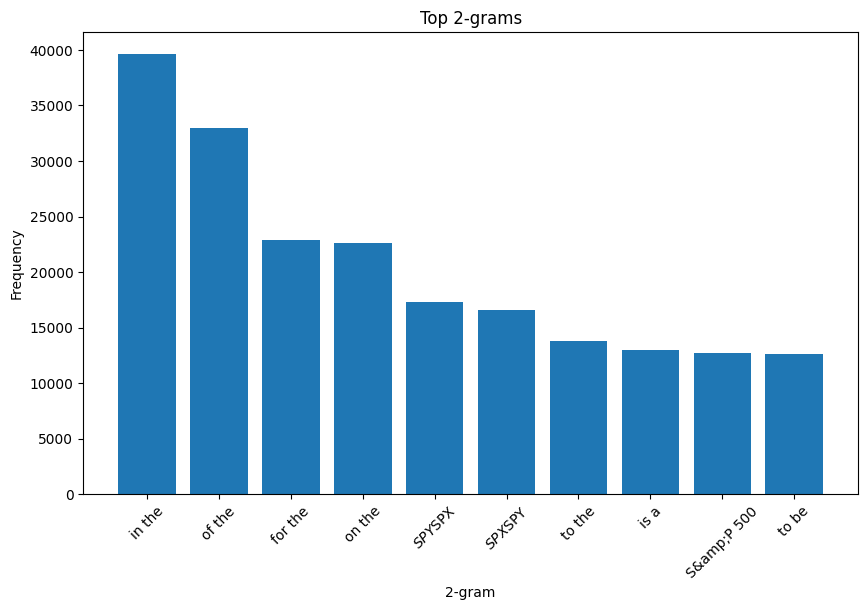

In [13]:
#Histogram bi-gram before preprocessing
import matplotlib.pyplot as plt
from collections import Counter

# Create a list of trigrams
n = 2  # Change n to 3 for trigrams
n_grams = [' '.join(words[i:i + n]) for i in range(len(words) - n + 1)]

# Count the frequencies of trigrams
n_gram_freq = Counter(n_grams)

# Get the most common trigrams and their frequencies
most_common_ngrams = n_gram_freq.most_common(10)  # Change 10 to the number of trigrams you want to display

# Extract trigrams and their frequencies
ngram, frequency = zip(*most_common_ngrams)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(ngram, frequency)
plt.title(f"Top {n}-grams")
plt.xlabel(f"{n}-gram")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

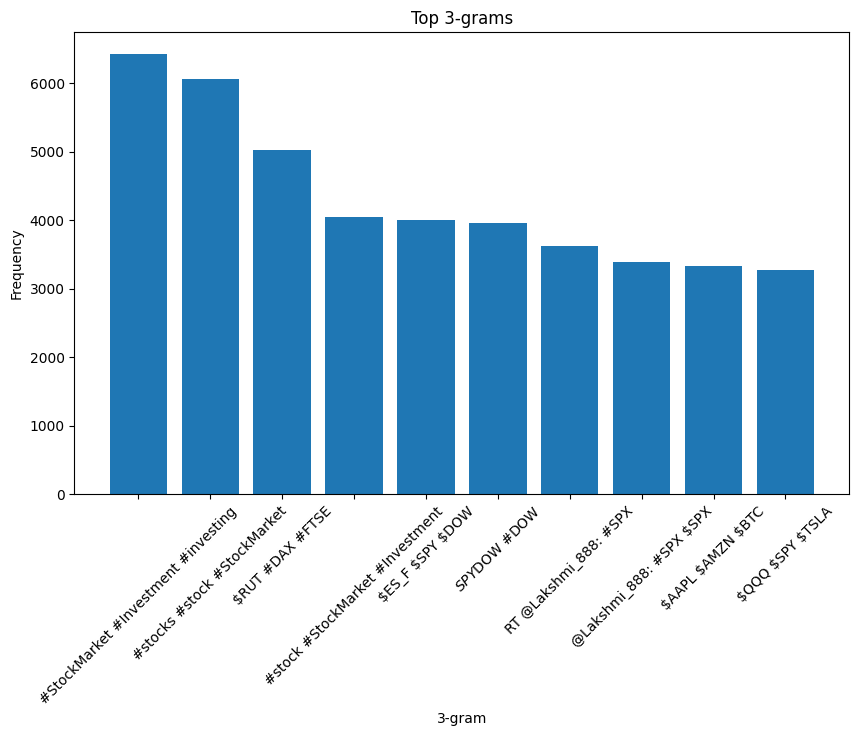

In [14]:
#Trigrams (before preprocessing)
import matplotlib.pyplot as plt
from collections import Counter

# Create a list of n-grams (e.g., bigrams, trigrams)
n = 3  # Change n to 2 for bigrams
n_grams = [' '.join(words[i:i + n]) for i in range(len(words) - n + 1)]

# Count the frequencies of n-grams
n_gram_freq = Counter(n_grams)

# Get the most common n-grams and their frequencies
most_common_ngrams = n_gram_freq.most_common(10)  # Change 10 to the number of n-grams you want to display

# Extract n-grams and their frequencies
ngram, frequency = zip(*most_common_ngrams)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(ngram, frequency)
plt.title(f"Top {n}-grams")
plt.xlabel(f"{n}-gram")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [49]:
#Apply Vader before preprocessing
# Install the vaderSentiment library
!pip install vaderSentiment

# Import necessary libraries
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Specify the file path for your CSV file in Colab
input_file_path = "/content/tweets_remaining_09042020_16072020.csv"
output_file_path = "/content/tweets_with_sentiment_VADER.csv"

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Read the CSV file into a DataFrame, specifying the encoding and delimiter
df = pd.read_csv(input_file_path, encoding='utf-8', delimiter=';', error_bad_lines=False)

# Function to get VADER sentiment score for each text
def get_vader_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Using the compound score

# Apply VADER to the 'full_text' column and create 'Vader_Stem' column
df['Vader_Stem'] = df['full_text'].apply(get_vader_sentiment)

# Save the updated DataFrame to the new CSV file
df.to_csv(output_file_path, index=False)

print(f"VADER sentiment analysis completed. Results saved to {output_file_path}")



<ipython-input-49-49c14c0d82ca>:17: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(input_file_path, encoding='utf-8', delimiter=';', error_bad_lines=False)


VADER sentiment analysis completed. Results saved to /content/tweets_with_sentiment_VADER.csv


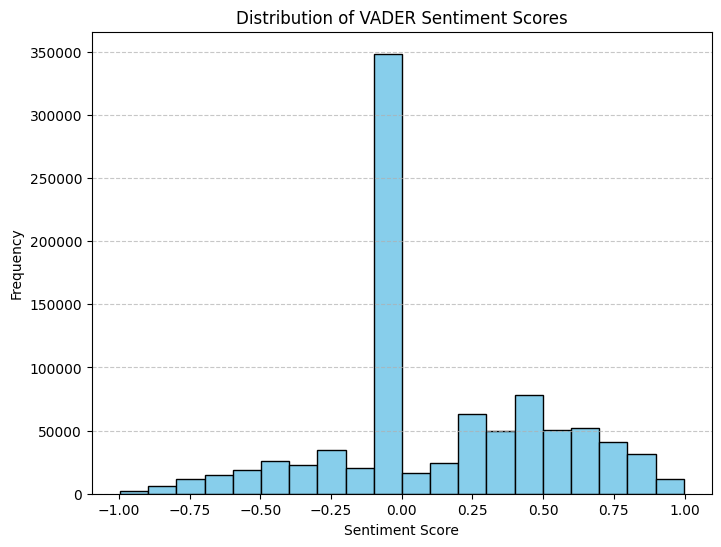

In [47]:
#Histogram - Distribution of Vader Sentiment Scores
import pandas as pd

# Try different encodings
encodings_to_try = ['utf-8', 'latin1', 'ISO-8859-1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        break  # If successful, exit the loop
    except pd.errors.ParserError:
        continue

# Plot the distribution of VADER sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(df['Vader_Stem'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of VADER Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

